In [1]:
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('04.Seattle_Hotels.csv', encoding="latin-1")

# print(df.head())
# print('Number of hotels in the dataset:', len(df))


def print_description(index):
    example = df[df.index == index][['desc', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])
        
print(f'Description of the 10th hotel:')
print_description(10)

Description of the 10th hotel:
Soak up the vibrant scene in the Living Room Bar and get in the mix with our live music and DJ series before heading to a memorable dinner at TRACE. Offering inspired seasonal fare in an award-winning atmosphere, it's a not-to-be-missed culinary experience in downtown Seattle. Work it all off the next morning at FIT®, our state-of-the-art fitness center before wandering out to explore many of the area's nearby attractions, including Pike Place Market, Pioneer Square and the Seattle Art Museum. As always, we've got you covered during your time at W Seattle with our signature Whatever/Whenever® service - your wish is truly our command.
Name: W Seattle



📘 Vocabulary (word -> column index):
  located southern tip → column 6916
  southern tip lake → column 10951
  tip lake union → column 11913
  lake union hilton → column 6417
  union hilton garden → column 12204
  hilton garden inn → column 5275
  garden inn seattle → column 4744
  inn seattle downtown → column 6029
  seattle downtown hotel → column 10125
  downtown hotel perfectly → column 3325
  hotel perfectly located → column 5616
  perfectly located business → column 8638
  located business leisure → column 6843
  business leisure neighborhood → column 1719
  leisure neighborhood home → column 6541
  neighborhood home numerous → column 7961
  home numerous major → column 5363
  numerous major international → column 8130
  major international companies → column 7105
  international companies including → column 6117
  companies including amazon → column 2520
  including amazon google → column 5897
  amazon google melinda → column 548
  google melinda gates → column 4837
  melinda g

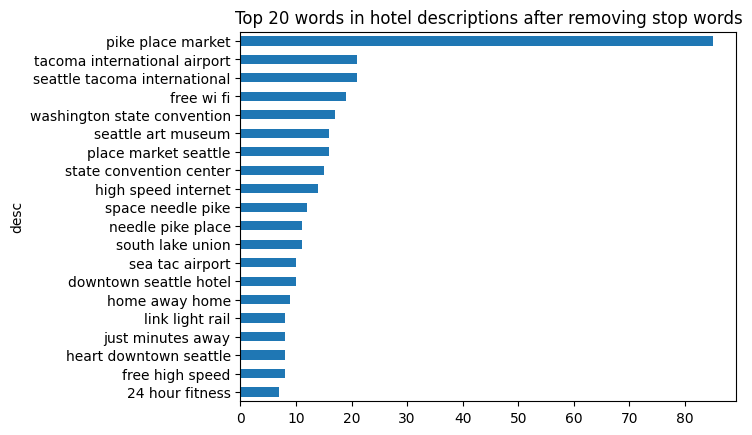

In [ ]:
def get_top_n_words(corpus, n=1, k=None):
    """
    Extracts and returns the top k most frequent n-grams (e.g., words, bigrams, trigrams)
    from a given text corpus.

    Parameters
    ----------
    corpus : list[str]
        A list of text documents (each element is a string). Example:
        ["I love cats", "I love dogs too"]

    n : int, optional (default=1)
        The 'n' in n-gram.
        - n=1 → unigrams (single words)
        - n=2 → bigrams (two-word phrases)
        - n=3 → trigrams (three-word phrases), etc.

    k : int or None, optional (default=None)
        The number of top frequent words or n-grams to return.
        If None, returns all words sorted by frequency.

    Returns
    -------
    list[tuple[str, int]]
        A list of tuples: [(word_or_ngram, frequency), ...]
        Sorted by frequency in descending order.

    Example
    -------
    >>> corpus = ["I love cats", "I love dogs too"]
    >>> get_top_n_words(corpus, n=1, k=3)
    [('love', 2), ('i', 2), ('cats', 1)]
    """

    # Initialize a CountVectorizer to count occurrences of n-grams in the corpus.
    # - ngram_range=(n, n): ensures we only consider n-grams of length exactly 'n'.
    # - stop_words: removes common English stopwords (like 'the', 'and', 'is').
    vec = CountVectorizer(ngram_range=(n, n), stop_words=list(ENGLISH_STOP_WORDS)).fit(corpus)

  
    # 1️⃣ Print the vocabulary dictionary
    # vec.vocabulary_ is a dict mapping each word to its column index in the bag-of-words matrix
    print("\n📘 Vocabulary (word -> column index):")
    for word, idx in vec.vocabulary_.items():
        print(f"  {word:10s} → column {idx}")


    # 2️⃣ Print the list of feature names
    # get_feature_names_out() returns all the feature names (words) in the same order as the matrix columns
    print("\n📗 Feature names (columns of bag_of_words):")
    print(vec.get_feature_names_out())

    # Transform the corpus into a bag-of-words matrix (documents × n-grams)
    # Each entry represents how many times an n-gram appears in that document.
    bag_of_words = vec.transform(corpus)

    # 3️⃣ Print the shape of the bag-of-words matrix
    # bag_of_words.shape shows the matrix dimensions: (number_of_documents, number_of_features)
    print("\n📙 Shape of bag_of_words matrix:")
    print(f"  {bag_of_words.shape[0]} documents × {bag_of_words.shape[1]} features")

    # (Optional) Print the actual matrix content for better visualization
    # .toarray() converts the sparse matrix into a dense NumPy array
    print("\n📊 Bag of Words Matrix:")
    print(bag_of_words.toarray())

    # Sum all columns (axis=0) to get total count of each n-gram across all documents.
    # 得到词汇表里所有词汇的出现次数，为后续的特征选择、权重计算等提供基础数据
    sum_words = bag_of_words.sum(axis=0)

    # Build a list of (word_or_ngram, frequency) pairs.
    # vec.vocabulary_ is a dictionary that maps each unique n-gram (word or phrase) 
    # to its corresponding column index in the bag_of_words matrix. 
    # This mapping allows us to efficiently access the frequency count of each n-gram 
    # by using the column index retrieved from this dictionary.
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Sort by frequency in descending order (most frequent first).
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Return only the top 'k' results (or all if k=None).
    return words_freq[:k]

common_words = get_top_n_words(df['desc'], 3, 20)

df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])

print(df1.head(20))

# df1.groupby('desc').sum()['count'].sort_values().plot(kind='barh', title='Top 20 words in hotel descriptions after removing stop words')
df1.sort_values("count", ascending=False).plot(kind='barh', title='Top 20 words in hotel descriptions after removing stop words')
plt.show()

```py
    # Sum all columns (axis=0) to get total count of each n-gram across all documents.
    sum_words = bag_of_words.sum(axis=0)
```
bag_of_words: 这是一个词袋模型的矩阵，通常形状为 (文档数, 词汇数)。在这个案例当中，文档数为csv的行数，152行，即CSV当中152个酒店的desc. 而3-gram的词汇数为13908. 每一列代表一个特定的n-gram（词组），也是这个模型的一个特征值。

   axis=0: 这个参数指定沿着行的方向进行求和，对每一列（每个n-gram）的所有行进行加总， 最后得到一个长度为13908的数组，表示每个n-gram在整个词汇表中出现的总次数。 也就是每个特征值的总出现次数。 也就是每个特征值的总频。

假设 bag_of_words 矩阵是这样的（3个文档，4个n-gram）：

```py
        n-gram_A  n-gram_B  n-gram_C  n-gram_D
文档1:     [2]        [0]        [1]        [3]
文档2:     [1]        [2]        [0]        [1]  
文档3:     [0]        [1]        [2]        [2]

```

执行 bag_of_words.sum(axis=0) 后：

n-gram_A: 2 + 1 + 0 = 3
n-gram_B: 0 + 2 + 1 = 3
n-gram_C: 1 + 0 + 2 = 3
n-gram_D: 3 + 1 + 2 = 6

结果：sum_words = [3, 3, 3, 6]

#### 实际意义 ####
这一步的目的是：

- 统计全局频率：计算每个n-gram在整个语料库中的总出现次数
- 特征工程：为后续的文本分析、机器学习模型提供基础统计信息
- 降维处理：从文档级别的词频矩阵转换为词汇级别的频率统计

#### 矩阵解释 ####

每一行代表一个文档，每一列代表一个特定的n-gram：

文档1：n-gram_A出现2次，n-gram_B出现0次，n-gram_C出现1次，n-gram_D出现3次
文档2：n-gram_A出现1次，n-gram_B出现2次，n-gram_C出现0次，n-gram_D出现1次
文档3：n-gram_A出现0次，n-gram_B出现1次，n-gram_C出现2次，n-gram_D出现2次

这样就得到了每个文档中各个n-gram的精确词频统计。
- 每个文档的每个n-gram都有具体的出现次数
- 这些计数反映了实际文本中词汇的频率分布
- 通过 sum(axis=0) 操作，我们得到了每个n-gram在整个语料库中的总出现次数




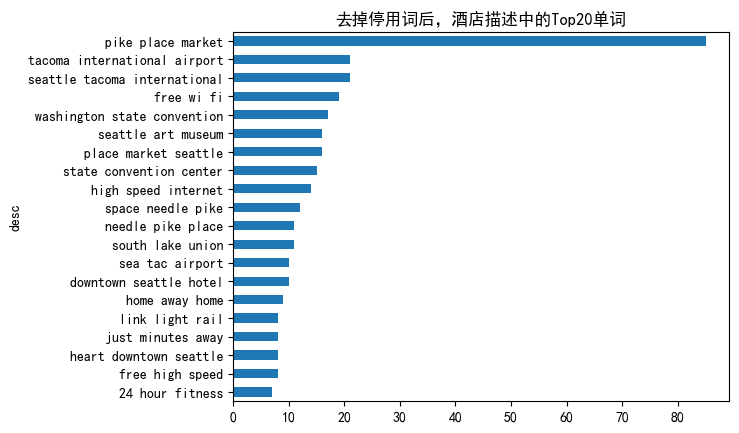

In [ ]:
# 得到酒店描述中n-gram特征中的TopK个
def get_top_n_words(corpus, n=1, k=None):
    # 统计ngram词频矩阵
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # 按照词频从大到小排序
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]
common_words = get_top_n_words(df['desc'], 3, 20)
#print(common_words)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df1.groupby('desc').sum()['count'].sort_values().plot(kind='barh', title='去掉停用词后，酒店描述中的Top20单词')
plt.show()

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
# 文本预处理
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
# 对文本进行清洗
def clean_text(text):
    # 全部小写
    text = text.lower()
    # 用空格替代一些特殊符号，如标点
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    # 移除BAD_SYMBOLS_RE
    text = BAD_SYMBOLS_RE.sub('', text)
    # 从文本中去掉停用词
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS) 
    return text
# 对desc字段进行清理，apply针对某列
df['desc_clean'] = df['desc'].apply(clean_text)
#print(df['desc_clean'])

In [ ]:
# 建模
df.set_index('name', inplace = True)
# 使用TF-IDF提取文本特征，使用自定义停用词列表, 1元特征（1000） + 2元特征（1200） + 3元特征（1147）=3347
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0.01, stop_words=list(ENGLISH_STOP_WORDS))
# 针对desc_clean提取tfidf
tfidf_matrix = tf.fit_transform(df['desc_clean'])
print('TFIDF feature names:')
#print(tf.get_feature_names_out())
print(len(tf.get_feature_names_out()))
print('tfidf_matrix:')

TFIDF feature names:
3347
tfidf_matrix:


In [12]:
# 计算酒店之间的余弦相似度（线性核函数）
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_similarities)
print(cosine_similarities.shape)
indices = pd.Series(df.index) #df.index是酒店名称

[[1.         0.03930478 0.09970189 ... 0.04875507 0.02296214 0.0262131 ]
 [0.03930478 1.         0.05892777 ... 0.06130707 0.01516305 0.03543109]
 [0.09970189 0.05892777 1.         ... 0.08718294 0.04218405 0.04985284]
 ...
 [0.04875507 0.06130707 0.08718294 ... 1.         0.05751589 0.03948025]
 [0.02296214 0.01516305 0.04218405 ... 0.05751589 1.         0.01602277]
 [0.0262131  0.03543109 0.04985284 ... 0.03948025 0.01602277 1.        ]]
(152, 152)


In [13]:
# 基于相似度矩阵和指定的酒店name，推荐TOP10酒店
def recommendations(name, cosine_similarities = cosine_similarities):
    recommended_hotels = []
    # 找到想要查询酒店名称的idx
    idx = indices[indices == name].index[0]
    print('idx=', idx)
    # 对于idx酒店的余弦相似度向量按照从大到小进行排序
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)
    # 取相似度最大的前10个（除了自己以外）
    top_10_indexes = list(score_series.iloc[1:11].index)
    # 放到推荐列表中
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])
    return recommended_hotels
print(recommendations('Hilton Seattle Airport & Conference Center'))
print(recommendations('The Bacon Mansion Bed and Breakfast'))


idx= 49
['Embassy Suites by Hilton Seattle Tacoma International Airport', 'DoubleTree by Hilton Hotel Seattle Airport', 'Seattle Airport Marriott', 'Four Points by Sheraton Downtown Seattle Center', 'Motel 6 Seattle Sea-Tac Airport South', 'Hampton Inn Seattle/Southcenter', 'Radisson Hotel Seattle Airport', 'Knights Inn Tukwila', 'Hotel Hotel', 'Home2 Suites by Hilton Seattle Airport']
idx= 116
['11th Avenue Inn Bed and Breakfast', 'Shafer Baillie Mansion Bed & Breakfast', 'Gaslight Inn', 'Bed and Breakfast Inn Seattle', 'Chittenden House Bed and Breakfast', 'Hyatt House Seattle', 'Mozart Guest House', 'Silver Cloud Hotel - Seattle Broadway', 'WorldMark Seattle - The Camlin', 'Pensione Nichols Bed and Breakfast']
